<a href="https://colab.research.google.com/github/ShawonSUSTSWE/ML-Lab/blob/main/Final%20Assignment/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
y = data['y']
x = data.drop("y", axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)

(40689, 16)
(4522, 16)


In [ ]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22613,53,housemaid,married,unknown,no,0,no,no,cellular,22,aug,207,1,-1,0,unknown
10623,49,technician,married,secondary,no,775,yes,no,unknown,16,jun,135,1,-1,0,unknown
40039,32,blue-collar,married,secondary,no,889,yes,no,cellular,3,jun,1076,2,85,3,other
2004,23,management,single,unknown,no,375,yes,no,unknown,9,may,194,3,-1,0,unknown
21045,36,technician,married,secondary,no,3579,no,no,cellular,14,aug,308,2,-1,0,unknown


In [ ]:
x_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
16488,32,admin.,single,secondary,no,1291,yes,no,cellular,23,jul,110,2,-1,0,unknown
33239,39,blue-collar,married,secondary,no,2299,yes,no,cellular,20,apr,450,1,271,1,failure
42214,26,management,single,tertiary,no,943,no,no,cellular,11,nov,166,1,195,1,success
3549,33,management,single,secondary,yes,-174,yes,no,unknown,15,may,156,5,-1,0,unknown
13285,41,blue-collar,single,secondary,no,-329,no,yes,cellular,8,jul,426,3,-1,0,unknown


<Axes: xlabel='count'>

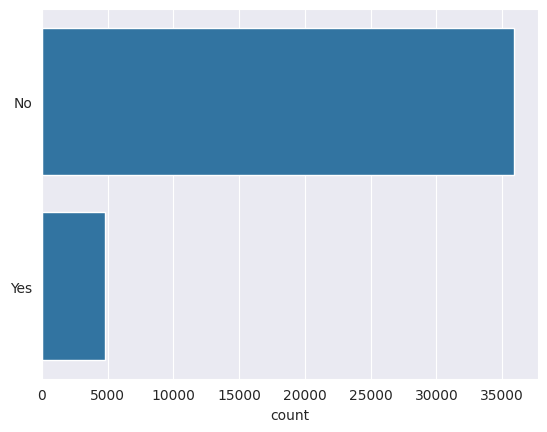

In [ ]:
l = []
for i in y_train:
    if(i == "yes"):
        l.append("Yes")
    else:
        l.append("No")
sns.set_style('darkgrid')
sns.countplot(l)

In [ ]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred = logistic_regression.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

0.891640866873065

['no' 'no' 'no' ... 'no' 'no' 'no']


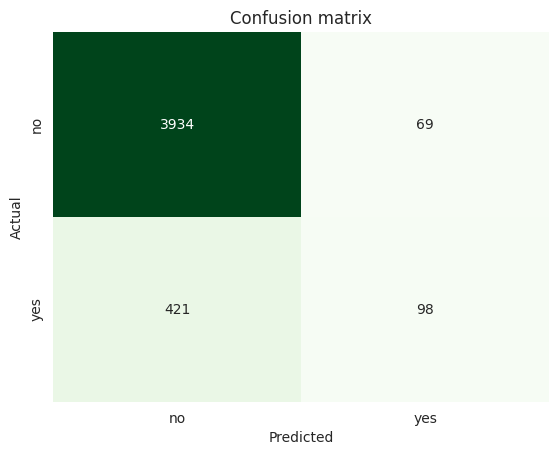

In [ ]:
cm=confusion_matrix(y_test,pred)
print(pred)
labels=['no','yes']
plt.title('Confusion matrix')
sns.heatmap(cm,cbar=False,xticklabels=labels,yticklabels=labels,fmt='d',annot=True,cmap=plt.cm.Greens)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Calculating Precision, Recall, Accuracy & F1-Score

tn,fp,fn,tp=cm.ravel()
accuracy=(tp+tn)/(tp+tn+fp+fn)*100
precision=tp/(tp+fp)*100
recall=tp/(tp+fn)*100
f1score=(2*precision*recall/(precision+recall))

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1score)

Accuracy: 89.1640866873065
Precision: 58.68263473053892
Recall: 18.88246628131021
F1 score: 28.571428571428573
